In [18]:
from prophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics

In [2]:
data = pd.read_csv('./UsageByDayClean.csv',usecols=['TIME','BIKE USAGE'])
data['TIME'] = pd.to_datetime(data['TIME'])
data.rename(columns={'TIME':'ds','BIKE USAGE':'y'},inplace=True)
pre_covid_date = pd.to_datetime('2020-02-29')
post_covid_date = pd.to_datetime('2022-01-21')
post_covid_data = data[data['ds'] > pre_covid_date]

17:54:54 - cmdstanpy - INFO - Chain [1] start processing
17:54:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


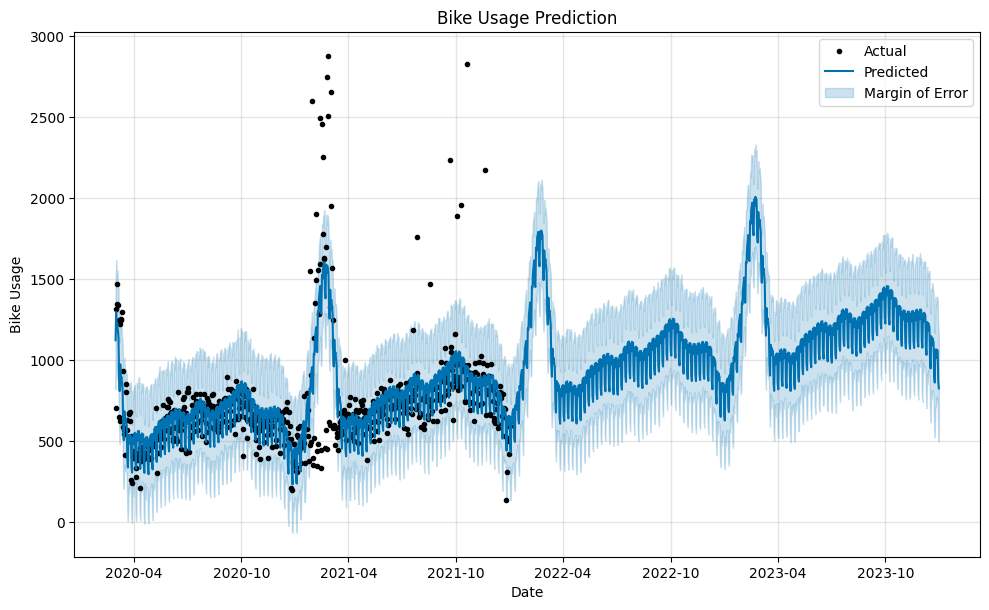

In [23]:
model = Prophet(yearly_seasonality=True,weekly_seasonality=True)
model.fit(post_covid_data)
future = model.make_future_dataframe(periods=730)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title('Bike Usage Prediction')
plt.xlabel('Date')
plt.ylabel('Bike Usage')
plt.legend(['Actual','Predicted','Margin of Error'])
plt.show()


c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

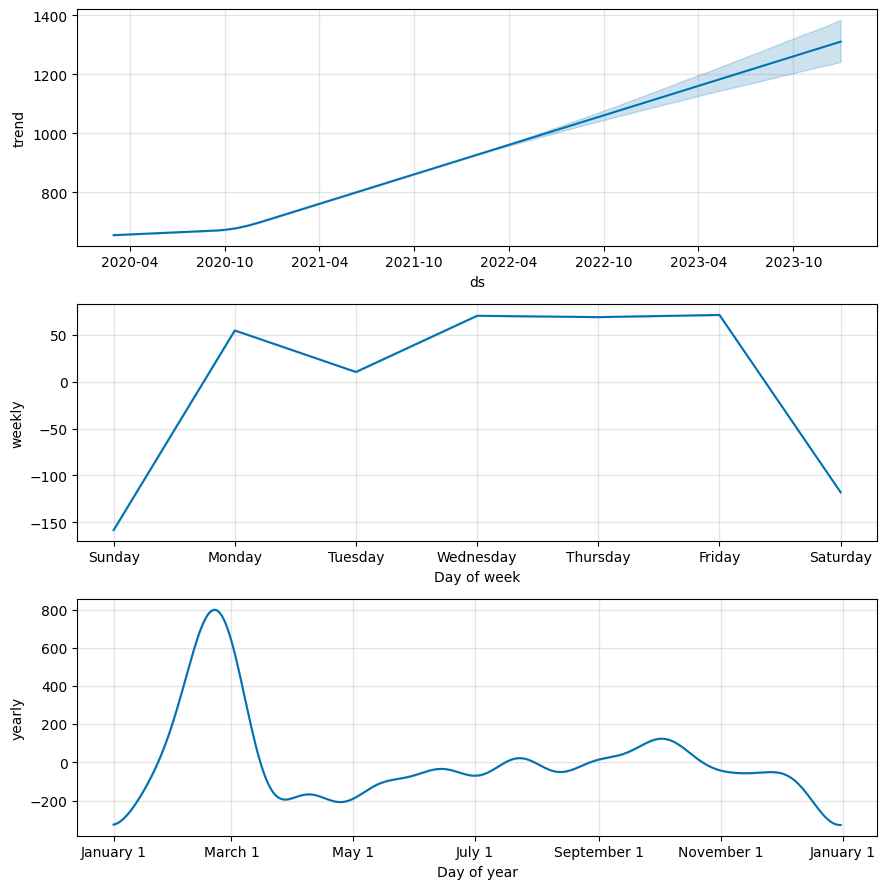

In [9]:
fig = model.plot_components(forecast)
plt.show()

In [17]:
forecast_median = forecast['yhat'].median()
# median of forecasted data after post covid date
post_covid_forecast_median = forecast[forecast['ds'] > post_covid_date]['yhat'].median()
# median of forecasted data during october 2023
oct_2023_forecast_median = forecast[(forecast['ds'] > pd.to_datetime('2023-10-01')) & (forecast['ds'] < pd.to_datetime('2023-10-31'))]['yhat'].median()
# median of actual data during october 2019
oct_2019_forecast_median = data[(data['ds'] > pd.to_datetime('2019-10-01')) & (data['ds'] < pd.to_datetime('2019-10-31'))]['y'].median()
print(f"forecast median: {forecast_median.__round__(2)}")
print(f"post covid forecast median: {post_covid_forecast_median.__round__(2)}")
print(f"october 2023 forecast median: {oct_2023_forecast_median.__round__(2)}")
print(f"october 2019 median: {oct_2019_forecast_median.__round__(2)}")

forecast median: 895.78
post covid forecast median: 1090.11
october 2023 forecast median: 1333.91
october 2019 median: 1318.0


In [20]:
# evaluating the accuracy of the model
df_cv = cross_validation(model,horizon='30 days',period='30 days',initial='365 days')
df_p = performance_metrics(df_cv)

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/10 [00:00<?, ?it/s]

01:34:21 - cmdstanpy - INFO - Chain [1] start processing
01:34:21 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 1/10 [00:00<00:01,  5.26it/s]01:34:21 - cmdstanpy - INFO - Chain [1] start processing
01:34:21 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:00<00:01,  5.29it/s]01:34:22 - cmdstanpy - INFO - Chain [1] start processing
01:34:22 - cmdstanpy - INFO - Chain [1] done processing
 30%|███       | 3/10 [00:00<00:01,  5.06it/s]01:34:22 - cmdstanpy - INFO - Chain [1] start processing
01:34:22 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:00<00:01,  4.92it/s]01:34:22 - cmdstanpy - INFO - Chain [1] start processing
01:34:22 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 5/10 [00:01<00:01,  4.84it/s]01:34:22 - cmdstanpy - INFO - Chain [1] start processing
01:34:22 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 6/10 [00:01<00:00,  4.71it/s]01:34:22 - cmdstanpy - INFO - Chain [1] start 

In [21]:
df_p.iloc[20:]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
20,23 days,51735.767549,227.454979,149.270928,0.176730,0.148265,0.190963,0.934483
21,24 days,49258.128724,221.941724,145.985229,0.277826,0.155263,0.210385,0.934483
22,25 days,21151.045107,145.433989,110.230059,0.267737,0.114466,0.185104,0.965517
23,26 days,21335.239663,146.065874,106.077817,0.258047,0.111279,0.183036,0.968966
24,27 days,16340.268798,127.829061,92.410899,0.157620,0.084400,0.154502,1.000000
25,28 days,19466.752193,139.523303,107.172996,0.164857,0.102969,0.167724,1.000000
26,29 days,22162.199393,148.869740,117.759119,0.187933,0.106471,0.184269,0.965517
27,30 days,19719.075311,140.424625,112.350653,0.178483,0.110105,0.167508,0.965517


In [22]:
df_p.to_csv('./performance post covid.csv',index=False)